In [53]:
import cv2
import glob
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import operator

In [106]:
images = glob.glob("../data/*jpg") + glob.glob("../data/*png")

In [107]:
def search_img(img):
    h = hog.compute(cv2.resize(img, (1024, 1024)))
    score = {}
    for i in images:
        h_ = hog.compute(cv2.resize(cv2.imread(i), (1024, 1024)))
        score[i] = cosine(h, h_)
    score = sorted(score.items(), key=operator.itemgetter(1))
    return score

In [108]:
img = cv2.imread("../data/unnamed (1).jpg")

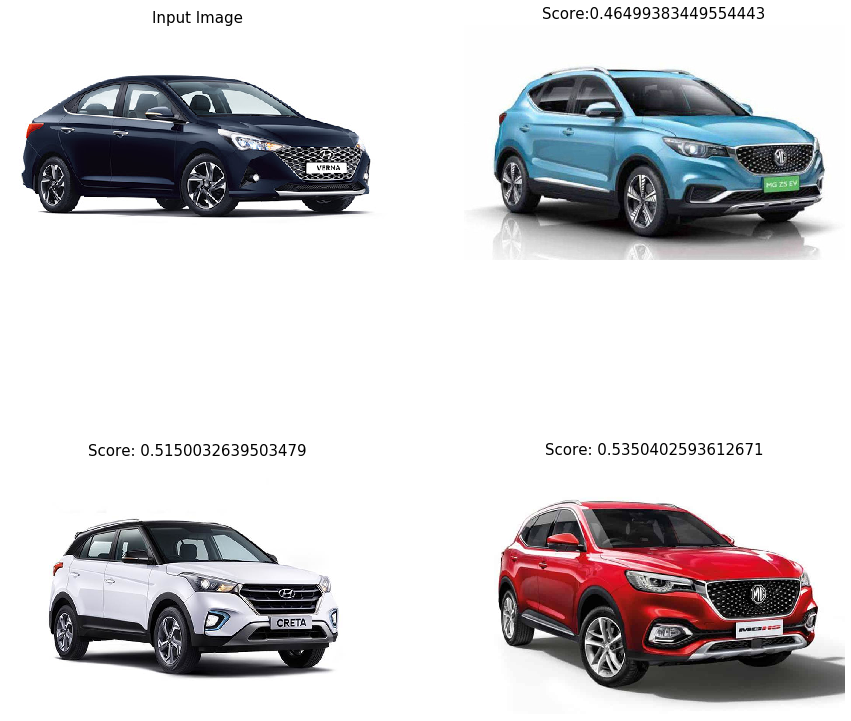

In [109]:
score = search_img(img)

top_results = []
for img_path, s in score:
    top_results.append([cv2.imread(img_path), s])

plt.rcParams["figure.figsize"] = (15, 15)
plt.subplot(221),plt.imshow(cv2.cvtColor(top_results[0][0], cv2.COLOR_BGR2RGB)),plt.title("Input Image", fontsize=15), plt.axis('off')
plt.subplot(222),plt.imshow(cv2.cvtColor(top_results[1][0], cv2.COLOR_BGR2RGB)),plt.title(f"Score:{top_results[1][1]}", fontsize=15), plt.axis('off')
plt.subplot(223),plt.imshow(cv2.cvtColor(top_results[2][0], cv2.COLOR_BGR2RGB)),plt.title(f"Score: {top_results[2][1]}", fontsize=15), plt.axis('off')
plt.subplot(224),plt.imshow(cv2.cvtColor(top_results[3][0], cv2.COLOR_BGR2RGB)),plt.title(f"Score: {top_results[3][1]}", fontsize=15), plt.axis('off')
plt.show()